<a href="https://colab.research.google.com/github/JSEFERINO/UdeA/blob/main/Intervalo_de_confianza_Julio_Hurtado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intervalo de confianza en Colab - INtervalos de Confianza - Parte I**
## **Realizado por: "Julio Hurtado"**


# **1. Datos**

In [1]:
# @title **Importamos las librerías que necesitamos**
import numpy as np
from scipy import stats
import pandas as pd

# Definición de los datos
data = {
    "CURSO": ["ESTADISTICA I",	"PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",
              "ESTADISTICA I",	"ESTADISTICA I",	"PROBABILIDAD ",	"PROBABILIDAD ",	"ESTADISTICA I",	"ESTADISTICA I",
              "ESTADISTICA I",	"PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",	"ESTADISTICA I",	"PROBABILIDAD ",
              "PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",	"ESTADISTICA I",	"PROBABILIDAD ",	"PROBABILIDAD ",
              "PROBABILIDAD ",	"ESTADISTICA I",	"ESTADISTICA I",	"PROBABILIDAD ",	"ESTADISTICA I",	"PROBABILIDAD ",
              "PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",
              "PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",
              "PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",	"PROBABILIDAD ",
              "PROBABILIDAD ",	"ESTADISTICA I",	"PROBABILIDAD ",	"ESTADISTICA I",	"ESTADISTICA I",	"ESTADISTICA I",
              "PROBABILIDAD ",	"ESTADISTICA I",	"ESTADISTICA I",	"ESTADISTICA I",	"ESTADISTICA I",	"ESTADISTICA I",
              "ESTADISTICA I",	"ESTADISTICA I",	"ESTADISTICA I",	"PROBABILIDAD ",	"ESTADISTICA I",	"PROBABILIDAD ",
              "PROBABILIDAD ",	"ESTADISTICA I",	"ESTADISTICA I",	"ESTADISTICA I",	"PROBABILIDAD ",	"PROBABILIDAD ",
              "ESTADISTICA I",	"PROBABILIDAD ",	"ESTADISTICA I",	"PROBABILIDAD "],

    "ASISTENCIA": ["50",	"50",	"35",	"60",	"50",	"40",	"50",	"55",	"60",	"40",	"45",	"55",	"60",	"55",	"60",
                   "60",	"50",	"50",	"60",	"60",	"60",	"60",	"60",	"60",	"45",	"60",	"60",	"40",	"60",	"40",
                   "60",	"60",	"55",	"45",	"60",	"60",	"45",	"60",	"60",	"60",	"60",	"55",	"60",	"60",	"60",
                   "60",	"60",	"60",	"45",	"45",	"60",	"55",	"60",	"35",	"60",	"30",	"60",	"60",	"40",	"60",
                   "50",	"55",	"35",	"40",	"40",	"55",	"35",	"45",	"50",	"55",	"35",	"45",	"40",	"40",	"25",	"50"],

    "PROGRAMA": ["PSICOLOGÍA",	"FINANZAS",	"FINANZAS",	"FINANZAS",	"FINANZAS",	"FINANZAS",	"COMUNICACIÓN",	"COMUNICACIÓN",
                 "MECATRONICA",	"FINANZAS",	"PSICOLOGÍA",	"PSICOLOGÍA",	"COMUNICACIÓN",	"MECANICA",	"MECANICA",	"ELECTRICA",
                 "COMUNICACIÓN",	"FINANZAS",	"INDUSTRIAL",	"INDUSTRIAL",	"SISTEMAS",	"COMUNICACIÓN",	"MECATRONICA",	"C_DATOS",
                 "FINANZAS",	"COMUNICACIÓN",	"PSICOLOGÍA",	"CIVIL",	"PSICOLOGÍA",	"MECANICA",	"SISTEMAS",	"SISTEMAS",
                 "FINANZAS",	"SISTEMAS",	"FINANZAS",	"SISTEMAS",	"FINANZAS",	"QUIMICA",	"FINANZAS",	"SISTEMAS",
                 "FINANZAS",	"FINANZAS",	"INDUSTRIAL",	"FINANZAS",	"SISTEMAS",	"INDUSTRIAL",	"SISTEMAS",	"FINANZAS",
                 "NAVAL",	"PSICOLOGÍA",	"SISTEMAS",	"PSICOLOGÍA",	"DERECHO",	"DERECHO",	"BIOMEDICA",	"DERECHO",
                 "DERECHO",	"DERECHO",	"DERECHO",	"DERECHO",	"DERECHO",	"DERECHO",	"DERECHO",	"C_DATOS",
                 "DERECHO",	"SISTEMAS",	"C_DATOS",	"DERECHO",	"PSICOLOGÍA",	"PSICOLOGÍA",	"ECONOMIA",	"ELECTRICA",
                 "PSICOLOGÍA",	"BIOMEDICA",	"DERECHO",	"CONTADURIA"],

    "EDAD": ["19",	"18",	"18",	"21",	"18",	"18",	"18",	"17",	"18",	"22",	"18",	"18",	"18",	"18",	"18",	"22",
             "21",	"19",	"18",	"19",	"18",	"19",	"18",	"17",	"19",	"20",	"19",	"18",	"17",	"18",	"20",	"19",
             "20",	"22",	"18",	"19",	"19",	"18",	"19",	"20",	"19",	"18",	"17",	"19",	"19",	"19",	"19",	"18",
             "17",	"18",	"19",	"20",	"23",	"18",	"18",	"20",	"18",	"18",	"18",	"18",	"18",	"19",	"17",	"17",
             "20",	"19",	"18",	"19",	"19",	"21",	"19",	"21",	"17",	"19",	"18",	"18"],

    "URBANO": ["SI",	"SI",	"SI",	"SI",	"SI",	"SI",	"NO",	"SI",	"SI",	"SI",	"NO",	"NO",	"SI",	"SI",	"SI",	"NO",
               "SI",	"NO",	"NO",	"SI",	"NO",	"NO",	"SI",	"SI",	"SI",	"NO",	"SI",	"SI",	"NO",	"NO",	"SI",	"NO",
               "SI",	"NO",	"SI",	"SI",	"NO",	"NO",	"NO",	"SI",	"SI",	"NO",	"SI",	"SI",	"SI",	"NO",	"SI",	"NO",
               "SI",	"NO",	"NO",	"SI",	"SI",	"SI",	"NO",	"SI",	"NO",	"SI",	"SI",	"SI",	"SI",	"NO",	"SI",	"SI",
               "SI",	"SI",	"SI",	"SI",	"NO",	"SI",	"SI",	"NO",	"SI",	"SI",	"SI",	"NO"],

    "PESO": ["45",	"56",	"67",	"69",	"50",	"61",	"50",	"59",	"70",	"73",	"65",	"65",	"57",	"70",	"80",	"70",
             "62",	"57",	"60",	"58",	"65",	"72",	"77",	"71",	"48",	"90",	"67",	"55",	"67",	"72",	"67",	"102",
             "55",	"60",	"60",	"75",	"76",	"55",	"48",	"88",	"50",	"59",	"60",	"60",	"64",	"53",	"49",	"70",
             "80",	"42",	"59",	"64",	"65",	"80",	"62",	"55",	"60",	"53",	"62",	"69",	"60",	"76",	"78",	"70",
             "78",	"52",	"55",	"48",	"82",	"65",	"65",	"50",	"50",	"54",	"55",	"60"],


    "ESTATURA": ["163",	"160",	"173",	"180",	"158",	"163",	"178",	"160",	"175",	"180",	"174",	"161",
                 "164",	"178",	"187",	"163",	"167",	"154",	"177",	"164",	"170",	"169",	"175",	"170",
                 "166",	"186",	"171",	"165",	"169",	"181",	"160",	"179",	"160",	"161",	"171",	"173",
                 "168",	"167",	"166",	"175",	"155",	"176",	"153",	"158",	"172",	"175",	"158",	"172",
                 "192",	"155",	"166",	"169",	"152",	"185",	"168",	"164",	"165",	"154",	"164",	"174",
                 "159",	"164",	"180",	"163",	"170",	"174",	"157",	"167",	"175",	"164",	"172",	"155",
                 "165",	"164",	"160",	"170"],

    "TRANSPORTE": ["Mototaxi",	"Particular",	"Transcaribe",	"Taxi",	"Taxi",	"Particular",	"Transcaribe",	"Transcaribe",
                   "bus",	"Mototaxi",	"Transcaribe",	"Mototaxi",	"Particular",	"Mototaxi",	"Mototaxi",	"Mototaxi",
                   "Transcaribe",	"Transcaribe",	"Particular",	"Transcaribe",	"Transcaribe",	"Particular",	"Transcaribe",	"Transcaribe",
                   "Transcaribe",	"Transcaribe",	"Mototaxi",	"Transcaribe",	"Mototaxi",	"Particular",	"Transcaribe",	"bus",
                   "Transcaribe",	"bus",	"Transcaribe",	"Transcaribe",	"bus",	"Mototaxi",	"Particular",	"Transcaribe",
                   "Mototaxi",	"Transcaribe",	"Transcaribe",	"Transcaribe",	"Transcaribe",	"Mototaxi",	"Transcaribe",	"bus",
                   "Particular",	"Transcaribe",	"bus",	"Transcaribe",	"Transcaribe",	"bus",	"Taxi",	"Mototaxi",	"bus",
                   "Mototaxi",	"Transcaribe",	"Transcaribe",	"Transcaribe",	"Mototaxi",	"Transcaribe",	"Mototaxi",
                   "Taxi",	"Transcaribe",	"Transcaribe",	"Particular",	"Transcaribe",	"Transcaribe",	"Mototaxi",	"bus",
                   "Transcaribe",	"Transcaribe",	"Taxi",	"bus"],

    "SEXO": ["Femenino",	"Femenino",	"Femenino",	"Masculino",	"Femenino",	"Femenino",	"Masculino",	"Femenino",	"Masculino",	"Masculino",
             "Masculino",	"Femenino",	"Femenino",	"Masculino",	"Masculino",	"Femenino",	"Femenino",	"Femenino",	"Femenino",	"Femenino",
             "Masculino",	"Femenino",	"Masculino",	"Masculino",	"Femenino",	"Masculino",	"Femenino",	"Masculino",	"Masculino",	"Masculino",
             "Masculino",	"Masculino",	"Femenino",	"Masculino",	"Femenino",	"Masculino",	"Femenino",	"Femenino",	"Femenino",	"Masculino",
             "Femenino",	"Femenino",	"Femenino",	"Femenino",	"Masculino",	"Femenino",	"Femenino",	"Femenino",	"Masculino",	"Femenino",
             "Masculino",	"Femenino",	"Femenino",	"Masculino",	"Femenino",	"Femenino",	"Femenino",	"Femenino",	"Femenino",	"Masculino",
             "Femenino",	"Masculino",	"Masculino",	"Femenino",	"Masculino",	"Masculino",	"Masculino",	"Femenino",	"Masculino",
             "Femenino",	"Masculino",	"Femenino",	"Masculino",	"Femenino",	"Femenino",	"Femenino"],

    "ESTRATO": ["II",	"V",	"IV",	"V",	"III",	"V",	"III",	"II",	"I",	"IV",	"IV",	"III",	"III",	"III",	"II",	"I",	"III",
                "II",	"II",	"V",	"I",	"II",	"II",	"I",	"II",	"IV",	"I",	"II",	"II",	"V",	"III",	"II",	"II",	"I",	"II",	"I",
                "I",	"I",	"III",	"III",	"III",	"IV",	"II",	"III",	"III",	"II",	"I",	"II",	"II",	"I",	"II",	"I",	"IV",
                "III",	"III",	"III",	"I",	"III",	"II",	"I",	"II",	"I",	"III",	"II",	"IV",	"IV",	"IV",	"IV",	"II",	"II",	"II",
                "II",	"III",	"II",	"IV",	"II"],
    "GR_SANGUINEO": ["O positivo",	"B positivo",	"B positivo",	"O positivo",	"A positivo",	"A positivo",	"O positivo",	"A positivo",
                     "A positivo",	"B positivo",	"O positivo",	"O positivo",	"O positivo",	"O positivo",	"O negativo",	"O positivo",
                     "B positivo",	"O positivo",	"O positivo",	"O positivo",	"B positivo",	"A positivo",	"O positivo",	"O positivo",
                     "O positivo",	"O positivo",	"A positivo",	"O positivo",	"A positivo",	"O positivo",	"B positivo",	"O positivo",
                     "O positivo",	"A positivo",	"O positivo",	"O negativo",	"O positivo",	"A positivo",	"O positivo",	"A positivo",
                     "A positivo",	"B positivo",	"O positivo",	"O positivo",	"B positivo",	"O positivo",	"O positivo",	"O positivo",
                     "O positivo",	"A positivo",	"O positivo",	"O positivo",	"O positivo",	"A positivo",	"O positivo",	"A positivo",
                     "A positivo",	"A positivo",	"O positivo",	"O positivo",	"A positivo",	"O positivo",	"O positivo",	"O positivo",
                     "O positivo",	"O positivo",	"A positivo",	"O positivo",	"A positivo",	"O positivo",	"O positivo",	"A positivo",
                     "O positivo",	"O positivo",	"O positivo",	"O positivo"]
}

# Creación del DataFrame
df = pd.DataFrame(data)



In [2]:
# @title **b. Mostrar el DataFrame**
df  # Muestra losdatos


,CURSO,ASISTENCIA,PROGRAMA,EDAD,URBANO,PESO,ESTATURA,TRANSPORTE,SEXO,ESTRATO,GR_SANGUINEO
0,ESTADISTICA I,50,PSICOLOGÍA,19,SI,45,163,Mototaxi,Femenino,II,O positivo
1,PROBABILIDAD,50,FINANZAS,18,SI,56,160,Particular,Femenino,V,B positivo
2,PROBABILIDAD,35,FINANZAS,18,SI,67,173,Transcaribe,Femenino,IV,B positivo
3,PROBABILIDAD,60,FINANZAS,21,SI,69,180,Taxi,Masculino,V,O positivo
4,PROBABILIDAD,50,FINANZAS,18,SI,50,158,Taxi,Femenino,III,A positivo
...,...,...,...,...,...,...,...,...,...,...,...
71,PROBABILIDAD,45,ELECTRICA,21,NO,50,155,bus,Femenino,II,A positivo
72,ESTADISTICA I,40,PSICOLOGÍA,17,SI,50,165,Transcaribe,Masculino,III,O positivo
73,PROBABILIDAD,40,BIOMEDICA,19,SI,54,164,Transcaribe,Femenino,II,O positivo
74,ESTADISTICA I,25,DERECHO,18,SI,55,160,Taxi,Femenino,IV,O positivo


In [3]:
# @title **c. Accediendo al atributo shape, el cual me muestra la cantidad de filas y columnas**
df.shape

(76, 11)

In [4]:
# @title **d. El Atributo -columns- muestra el nombre de las variables de nuestra base de Datos**
df.columns

Index(['CURSO', 'ASISTENCIA', 'PROGRAMA', 'EDAD', 'URBANO', 'PESO', 'ESTATURA',
       'TRANSPORTE', 'SEXO', 'ESTRATO', 'GR_SANGUINEO'],
      dtype='object')

In [5]:
# @title **e. El Atributo _dtypes_ muestra el tipo de las  variables**
### **Algunas variables numéricas aparecen como categoricas, dado que les aparece ',' en lugar de '.'**
df.dtypes

,0
CURSO,object
ASISTENCIA,object
PROGRAMA,object
EDAD,object
URBANO,object
PESO,object
ESTATURA,object
TRANSPORTE,object
SEXO,object
ESTRATO,object


In [6]:
# @title **f. Algunas variables numéricas aparecen como categoricas, dado que les aparece ',' en lugar de '.'**
df.info() # La variable EDAD aparece como cadena porque usa (,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CURSO         76 non-null     object
 1   ASISTENCIA    76 non-null     object
 2   PROGRAMA      76 non-null     object
 3   EDAD          76 non-null     object
 4   URBANO        76 non-null     object
 5   PESO          76 non-null     object
 6   ESTATURA      76 non-null     object
 7   TRANSPORTE    76 non-null     object
 8   SEXO          76 non-null     object
 9   ESTRATO       76 non-null     object
 10  GR_SANGUINEO  76 non-null     object
dtypes: object(11)
memory usage: 6.7+ KB


# **2. Resumen estadístico de los datos**

In [7]:
# @title **a. Mostrando analisis descriptivos de la información del DataFrame**
df.describe() # Considera todas las variables como objetos


,CURSO,ASISTENCIA,PROGRAMA,EDAD,URBANO,PESO,ESTATURA,TRANSPORTE,SEXO,ESTRATO,GR_SANGUINEO
count,76,76,76,76,76,76,76,76,76,76,76
unique,2,8,16,7,2,33,32,5,2,5,4
top,PROBABILIDAD,60,FINANZAS,18,SI,60,164,Transcaribe,Femenino,II,O positivo
freq,47,34,16,31,49,8,7,36,44,27,46


In [8]:
# @title **b. Usando el método _astype()_ hacemos el cambio de tipo de variables**
df["ASISTENCIA"]=df["ASISTENCIA"].astype(np.int64)
df["EDAD"]=df["EDAD"].astype(np.int64)
df["PESO"]=df["PESO"].astype(np.int64)
df["ESTATURA"]=df["ESTATURA"].astype(np.int64)

In [9]:
# @title **c. El Método _info()_ muestra el tipo de las  variables en un DataFrame**

df.info() # La variable EDAD aparece como cadena porque usa (,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CURSO         76 non-null     object
 1   ASISTENCIA    76 non-null     int64 
 2   PROGRAMA      76 non-null     object
 3   EDAD          76 non-null     int64 
 4   URBANO        76 non-null     object
 5   PESO          76 non-null     int64 
 6   ESTATURA      76 non-null     int64 
 7   TRANSPORTE    76 non-null     object
 8   SEXO          76 non-null     object
 9   ESTRATO       76 non-null     object
 10  GR_SANGUINEO  76 non-null     object
dtypes: int64(4), object(7)
memory usage: 6.7+ KB


In [10]:
# @title **d. El Método _describe()_ muestra los estadisticos  concalculado las  variables en un DataFrame**
### **Mostrando analisis descriptivos de la información del DataFrame**
df.describe() # Si aparece todas las variables

,ASISTENCIA,EDAD,PESO,ESTATURA
count,76.000000,76.000000,76.000000,76.000000
mean,51.776316,18.750000,63.526316,167.986842
std,9.405812,1.287116,11.244523,8.686378
min,25.000000,17.000000,42.000000,152.000000
25%,45.000000,18.000000,55.000000,162.500000
50%,55.000000,18.000000,62.000000,167.000000
75%,60.000000,19.000000,70.000000,174.000000
max,60.000000,23.000000,102.000000,192.000000


# **3. Ampliando el DataFrame - Ingresando una Nueva Variable**

In [11]:

# @title **a. Cargando la variable**
DEFINITIVA = [4.5, 4.5, 1.5, 2.9, 2.6, 3.1, 2.7, 2.9, 3.9, 4.2, 3.5, 3.5,
              4.4, 4.2, 4.2, 4.2, 3.3, 4.3, 3.2, 2.2, 4.4, 3.7, 4.3, 3.7,
              3.0, 4.4, 4.6, 3.1, 3.7, 4.1, 3.7, 4.3, 0.9, 4.2, 3.6, 3.1,
              4.5, 3.7, 3.8, 3.5, 3.4, 4.2, 3.1, 3.7, 2.6, 3.9, 4.2, 3.6,
              3.5, 2.4, 4.0, 4.1, 3.7, 4.4, 3.3, 3.4, 3.9, 3.3, 2.5, 4.5,
              3.5, 4.2, 4.8, 4.4, 3.4, 3.7, 3.0, 2.4, 2.0, 4.2, 3.4, 3.5, 4.1, 2.6, 3.6, 3.4,
]

In [12]:


# @title **b. Así se agrega  a nuestro nuevo DataFrame la columna que hemos creado**
df["DEFINITIVA"] = DEFINITIVA
df.head() # confirmando realmente que se agregó la columna

,CURSO,ASISTENCIA,PROGRAMA,EDAD,URBANO,PESO,ESTATURA,TRANSPORTE,SEXO,ESTRATO,GR_SANGUINEO,DEFINITIVA
0,ESTADISTICA I,50,PSICOLOGÍA,19,SI,45,163,Mototaxi,Femenino,II,O positivo,4.5
1,PROBABILIDAD,50,FINANZAS,18,SI,56,160,Particular,Femenino,V,B positivo,4.5
2,PROBABILIDAD,35,FINANZAS,18,SI,67,173,Transcaribe,Femenino,IV,B positivo,1.5
3,PROBABILIDAD,60,FINANZAS,21,SI,69,180,Taxi,Masculino,V,O positivo,2.9
4,PROBABILIDAD,50,FINANZAS,18,SI,50,158,Taxi,Femenino,III,A positivo,2.6


In [13]:

# @title **c. Descriptores numerícos de la Data**
df.describe()

,ASISTENCIA,EDAD,PESO,ESTATURA,DEFINITIVA
count,76.000000,76.000000,76.000000,76.000000,76.000000
mean,51.776316,18.750000,63.526316,167.986842,3.578947
std,9.405812,1.287116,11.244523,8.686378,0.751588
min,25.000000,17.000000,42.000000,152.000000,0.900000
25%,45.000000,18.000000,55.000000,162.500000,3.175000
50%,55.000000,18.000000,62.000000,167.000000,3.700000
75%,60.000000,19.000000,70.000000,174.000000,4.200000
max,60.000000,23.000000,102.000000,192.000000,4.800000


# **4. Descriptores Numéricos**

In [14]:
# @title **a. Descriptores numéricos Bivariados 'PROMEDIO vs SEXO'**
print('DEFINITIVA vs SEXO')
df.groupby('SEXO')['DEFINITIVA'].agg(['mean', 'std', 'var', 'count'])


DEFINITIVA vs SEXO


,mean,std,var,count
SEXO,,,,
Femenino,3.461364,0.806721,0.650798,44
Masculino,3.740625,0.646010,0.417329,32


In [19]:
# @title **c. Coeficiente de variación - Descriptores numéricos Bivariados 'PROMEDIO vs SEXO'**
print('DEFINITIVA vs SEXO')
df2 = df.groupby('SEXO')['DEFINITIVA'].agg(['mean', 'std', 'var', 'count'])
df2['coef_var(%)'] = round((df2['std'] / df2['mean']) * 100,1)
df2['std_mean'] = round(df2['std'] / np.sqrt(df2['count']),3)
df2

DEFINITIVA vs SEXO


,mean,std,var,count,coef_var(%),std_mean
SEXO,,,,,,
Femenino,3.461364,0.806721,0.650798,44,23.3,0.122
Masculino,3.740625,0.646010,0.417329,32,17.3,0.114


In [24]:
# @title **d. Coeficiente de variación - Descriptores numéricos Bivariados 'PROMEDIO vs SEXO'**
print('DEFINITIVA vs SEXO')
df2 = df.groupby('SEXO')['DEFINITIVA'].agg(['mean', 'std', 'var', 'count'])
df2['coef_var(%)'] = round((df2['std'] / df2['mean']) * 100,1)
df2['std_mean'] = round(df2['std'] / np.sqrt(df2['count']),3)
# Applying the calculation to each row and storing as a tuple
df2['IC(μ) - 95%'] = df2.apply(lambda row: (round(row['mean'] - 1.96 * row['std_mean'], 2), round(row['mean'] + 1.96 * row['std_mean'], 2)), axis=1)
df2

DEFINITIVA vs SEXO


,mean,std,var,count,coef_var(%),std_mean,IC(μ) - 95%
SEXO,,,,,,,
Femenino,3.461364,0.806721,0.650798,44,23.3,0.122,"(3.22, 3.7)"
Masculino,3.740625,0.646010,0.417329,32,17.3,0.114,"(3.52, 3.96)"


# **5. Intervalos de Confianza Z - Descriptores numéricos Bivariados 'DEFINITIVA vs ESTRATO'**

In [72]:
# @title **a. Intervalos de Confianza Z - Descriptores numéricos Bivariados 'DEFINITIVA vs ESTRATO'**

df3 = df.groupby('ESTRATO')['DEFINITIVA'].agg(['mean', 'std', 'median', 'count'])
df3['coef_var(%)'] = round((df3['std'] / df3['mean']) * 100,1)
# Calculate the IC for each group instead of the whole dataset
df3['IC(μ) - 95%'] = df3.apply(lambda row: (row['mean'] - 1.96 * row['std'] / np.sqrt(row['count']), row['mean'] + 1.96 * row['std'] / np.sqrt(row['count'])), axis=1)
df3

,mean,std,median,count,coef_var(%),IC(μ) - 95%
ESTRATO,,,,,,
I,3.973333,0.582441,4.2,15,14.7,"(3.678577268463113, 4.268089398203554)"
II,3.455556,0.809241,3.5,27,23.4,"(3.1503079033863766, 3.760803207724734)"
III,3.594444,0.621641,3.5,18,17.3,"(3.3072608147190015, 3.8816280741698876)"
IV,3.418182,0.853016,3.6,11,25.0,"(2.91408155267311, 3.922282083690527)"
V,3.360000,0.931665,3.1,5,27.7,"(2.5433594670848136, 4.1766405329151866)"


In [73]:
# @title **b. Intervalos de Confianza Z - 'DEFINITIVA vs ESTRATO' - Redondeando el Intervalo**

df3 = df.groupby('ESTRATO')['DEFINITIVA'].agg(['mean', 'std', 'median', 'count'])
### **b. Intervalos de Confianza Z - Descriptores numéricos Bivariados 'DEFINITIVA vs ESTRATO'**

df3 = df.groupby('ESTRATO')['DEFINITIVA'].agg(['mean', 'std', 'median', 'count'])
df3['coef_var(%)'] = round((df3['std'] / df3['mean']) * 100,1)
# Calculate the IC for each group instead of the whole dataset
df3['IC(μ) - 95%'] = df3.apply(lambda row: (round(row['mean'] - 1.96 * row['std'] / np.sqrt(row['count']),2), round(row['mean'] + 1.96 * row['std'] / np.sqrt(row['count']),2)), axis=1)
df3

,mean,std,median,count,coef_var(%),IC(μ) - 95%
ESTRATO,,,,,,
I,3.973333,0.582441,4.2,15,14.7,"(3.68, 4.27)"
II,3.455556,0.809241,3.5,27,23.4,"(3.15, 3.76)"
III,3.594444,0.621641,3.5,18,17.3,"(3.31, 3.88)"
IV,3.418182,0.853016,3.6,11,25.0,"(2.91, 3.92)"
V,3.360000,0.931665,3.1,5,27.7,"(2.54, 4.18)"


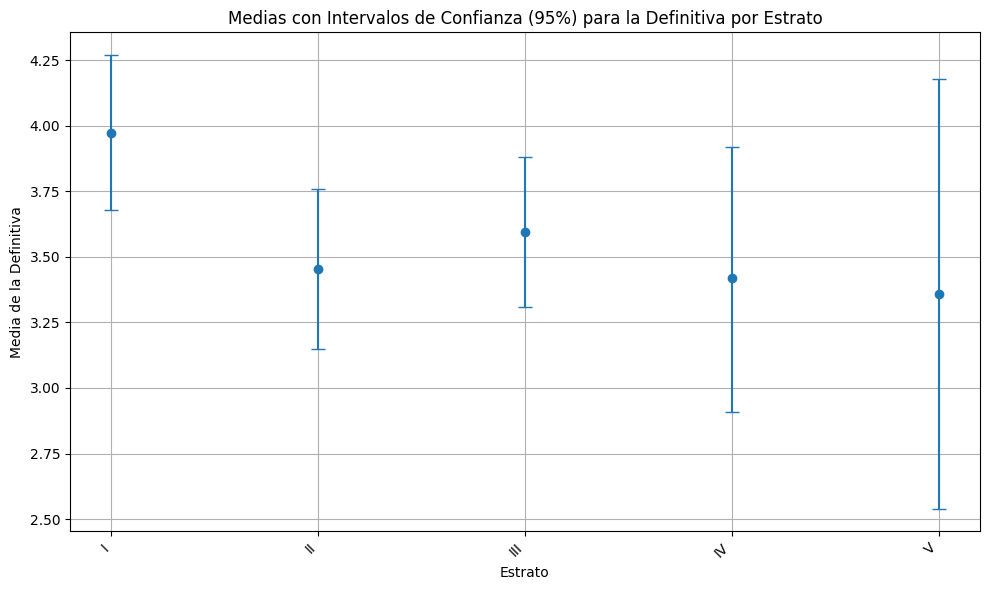

In [74]:
# @title **c. Grafico de Medias para los intervalos de confianza**

import matplotlib.pyplot as plt

# Extract data for the plot
estratos = df3.index
medias = df3['mean']
ic_lower = [interval[0] for interval in df3['IC(μ) - 95%']]
ic_upper = [interval[1] for interval in df3['IC(μ) - 95%']]

# Create the plot
plt.figure(figsize=(10, 6))
plt.errorbar(estratos, medias, yerr=[medias - ic_lower, ic_upper - medias], fmt='o', capsize=5)
plt.xlabel("Estrato")
plt.ylabel("Media de la Definitiva")
plt.title("Medias con Intervalos de Confianza (95%) para la Definitiva por Estrato")
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [75]:
# @title **d. Usando la distribución t de Student, pero no quiero el grafico $IC(\mu)=\bar{x}\pm t_{\alpha/2,n-1}*\frac{s}{\sqrt{n}}$**

# Calculate the IC using t-distribution for each group
df3['IC(μ) - 95% (t)'] = df3.apply(lambda row: stats.t.interval(0.95, df=row['count'] - 1, loc=row['mean'], scale=stats.sem(df[df['ESTRATO'] == row.name]['DEFINITIVA'])), axis=1)
df3


,mean,std,median,count,coef_var(%),IC(μ) - 95%,IC(μ) - 95% (t)
ESTRATO,,,,,,,
I,3.973333,0.582441,4.2,15,14.7,"(3.68, 4.27)","(3.65078798429434, 4.295878682372328)"
II,3.455556,0.809241,3.5,27,23.4,"(3.15, 3.76)","(3.1354302825400624, 3.775680828571048)"
III,3.594444,0.621641,3.5,18,17.3,"(3.31, 3.88)","(3.2853094976620896, 3.9035793912267995)"
IV,3.418182,0.853016,3.6,11,25.0,"(2.91, 3.92)","(2.845117845291107, 3.99124579107253)"
V,3.360000,0.931665,3.1,5,27.7,"(2.54, 4.18)","(2.2031848926946473, 4.516815107305353)"


In [78]:
# @title **d. Usando la distribución t de Student, pero no quiero el grafico $IC(\mu)=\bar{x}\pm t_{\alpha/2,n-1}*\frac{s}{\sqrt{n}}$**
# @title **d. Usando la distribución t de Student, pero no quiero el grafico $IC(\mu)=\bar{x}\pm t_{\alpha/2,n-1}*\frac{s}{\sqrt{n}}$**
df3['critical_t'] = df3.apply(lambda row: stats.t.ppf(0.975, df=row['count'] - 1), axis=1) # Add axis=1 to apply function
df3

,mean,std,median,count,coef_var(%),IC(μ) - 95%,IC(μ) - 95% (t),critical_t
ESTRATO,,,,,,,,
I,3.973333,0.582441,4.2,15,14.7,"(3.68, 4.27)","(3.65078798429434, 4.295878682372328)",2.144787
II,3.455556,0.809241,3.5,27,23.4,"(3.15, 3.76)","(3.1354302825400624, 3.775680828571048)",2.055529
III,3.594444,0.621641,3.5,18,17.3,"(3.31, 3.88)","(3.2853094976620896, 3.9035793912267995)",2.109816
IV,3.418182,0.853016,3.6,11,25.0,"(2.91, 3.92)","(2.845117845291107, 3.99124579107253)",2.228139
V,3.360000,0.931665,3.1,5,27.7,"(2.54, 4.18)","(2.2031848926946473, 4.516815107305353)",2.776445


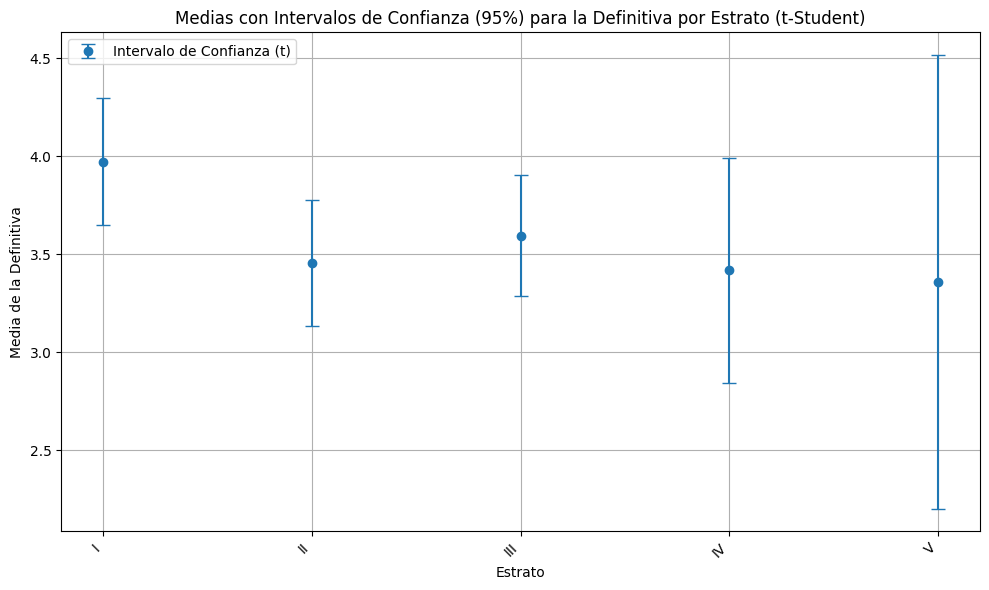

In [76]:
# prompt: Realiza los intervalos de confianza pero ahora usando la t de student

# Calculate the IC using t-distribution for each group
df3['IC(μ) - 95% (t)'] = df3.apply(lambda row: stats.t.interval(0.95, df=row['count'] - 1, loc=row['mean'], scale=stats.sem(df[df['ESTRATO'] == row.name]['DEFINITIVA'])), axis=1)
df3
# Extract data for the plot
estratos = df3.index
medias = df3['mean']
ic_lower_t = [interval[0] for interval in df3['IC(μ) - 95% (t)']]
ic_upper_t = [interval[1] for interval in df3['IC(μ) - 95% (t)']]

# Create the plot with t-distribution intervals
plt.figure(figsize=(10, 6))
plt.errorbar(estratos, medias, yerr=[medias - ic_lower_t, ic_upper_t - medias], fmt='o', capsize=5, label='Intervalo de Confianza (t)')
plt.xlabel("Estrato")
plt.ylabel("Media de la Definitiva")
plt.title("Medias con Intervalos de Confianza (95%) para la Definitiva por Estrato (t-Student)")
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()


# **6. Realiza los intervalos de Confianza para la Media Bivariada  'DEFINITIVA vs SEXO' - dos decimales**

# **7. Realiza los intervalos de Confianza para la Media Bivariada  'ESTATURA vs SEXO' - dos decimales**